In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df_loc = '/home/walml/repos/gz-euclid-datalab/data/pipeline/v3_challenge_midaug/catalogs/_master_catalog.csv'
df = pd.read_csv(df_loc)


/tmp/ipykernel_44196/2573475914.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_loc)


In [17]:
df = df.dropna(subset=['in_tile_overlap_region'])

In [1]:
# fig, ax = plt.subplots(figsize=(20, 20))
# overlap = df.query('in_tile_overlap_region')
# ax.scatter(df['right_ascension'], df['declination'], s=1.)
# ax.scatter(overlap['right_ascension'], overlap['declination'],  s=1., label='<1 arcmin of edge')
# ax.legend()

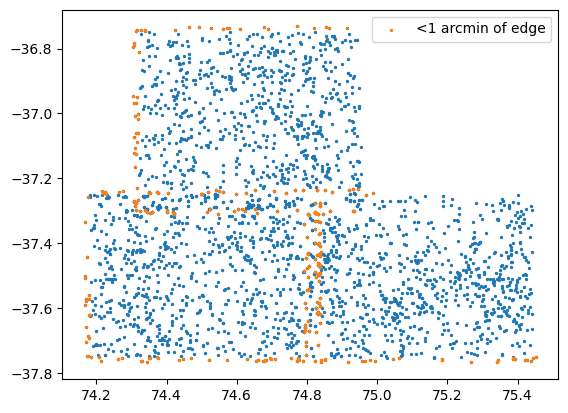

In [22]:
tile_indices = [102032677, 102032678, 102033254]
overlap = df.query('in_tile_overlap_region')
df = df[df['tile_index'].isin(tile_indices)]
plt.scatter(df['right_ascension'], df['declination'], s=2.)
plt.scatter(overlap['right_ascension'], overlap['declination'],  s=2., label='<1 arcmin of edge')
plt.legend()

In [6]:
from astropy.table import Table

tiles = Table.read('/home/walml/repos/gz-euclid-datalab/data/tiling_plan/field_all_sky_overview.fits').to_pandas()

In [13]:
tiles

,tilename,folderName,tileId,flavour,comment,RA,Dec,width,height,area,...,nsidec,mocc,nhpc,hpareac,nside,moc,nhp,hparea,min_dist_corner,min_dist_center
0,b'EUC_TILE_102000001',b'102000000_102000999',102000001,b'NORMAL',[],0.000000,-88.000000,32.000000,32.000000,0.285166,...,8192,336,4104,0,8192,358,5710,0,0.0,0.0
1,b'EUC_TILE_102000002',b'102000000_102000999',102000002,b'NORMAL',[],11.462793,-88.000000,32.000000,32.000000,0.285166,...,8192,377,4073,0,8192,402,5796,0,0.0,0.0
2,b'EUC_TILE_102000003',b'102000000_102000999',102000003,b'NORMAL',[],22.925586,-88.000000,32.000000,32.000000,0.285166,...,8192,369,4071,0,8192,391,5794,0,0.0,0.0
3,b'EUC_TILE_102000004',b'102000000_102000999',102000004,b'NORMAL',[],34.388378,-88.000000,32.000000,32.000000,0.285166,...,8192,372,4071,0,8192,399,5793,0,0.0,0.0
4,b'EUC_TILE_102000005',b'102000000_102000999',102000005,b'NORMAL',[],45.851171,-88.000000,32.000000,32.000000,0.285166,...,8192,369,4077,0,8192,406,5794,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170703,b'EUC_TILE_102504197',b'102504000_102504999',102504197,b'SPECIAL',"[G, _, A, N, D, R, O, M, E, D, A, 2, 9]",359.731667,30.755584,9.248000,9.248000,0.023767,...,8192,96,540,0,8192,96,540,0,0.0,0.0
170704,b'EUC_TILE_102504198',b'102504000_102504999',102504198,b'SPECIAL',"[C, l, _, J, 1, 1, 4, 5, ., 6, -, 5, 4, 2, 0]",359.770405,21.751813,28.741970,28.741970,0.229596,...,8192,320,4595,0,8192,368,4703,0,0.0,0.0
170705,b'EUC_TILE_102504199',b'102504000_102504999',102504199,b'SPECIAL',"[C, l, _, J, 1, 0, 1, 3, ., 6, +, 4, 9, 3, 3]",359.829987,-60.700001,79.640603,79.640603,1.761368,...,8192,1222,34417,1,8192,1290,34965,1,0.0,0.0
170706,b'EUC_TILE_102504200',b'102504000_102504999',102504200,b'SPECIAL',"[C, l, _, J, 1, 0, 1, 3, ., 7, +, 1, 9, 4, 6]",359.899902,-32.185101,18.974694,18.974694,0.099925,...,8192,201,1947,0,8192,212,2099,0,0.0,0.0


In [17]:
# def segmentation_map_id_to_tile_index(segmentation_map_id):
#     return int(str(segmentation_map_id)[1:])

tiles['tileId'].apply(lambda x: len(str(x))).value_counts()

tileId
9    170708
Name: count, dtype: int64

In [9]:
tiles['flavour'].value_counts()

flavour
b'NORMAL'     166506
b'SPECIAL'      4202
Name: count, dtype: int64

In [11]:
tiles[['RA', 'Dec']]

,RA,Dec
0,0.000000,-88.000000
1,11.462793,-88.000000
2,22.925586,-88.000000
3,34.388378,-88.000000
4,45.851171,-88.000000
...,...,...
170703,359.731667,30.755584
170704,359.770405,21.751813
170705,359.829987,-60.700001
170706,359.899902,-32.185101


In [12]:
tiles['RA'].dtype

dtype('float64')